In [5]:
# Websites ->

# 1.) Kaggle : It is an online platform which hosts thousands of free, ready-to-use
#              datasets across all fields (Platform for Data Science and Machine Learning)

# 2.) Dataset : Google Landmark Dataset [train.csv file and
#               Image Downloadable Files (500 GB) (Dowload 2 GB '000' and '001' files for our data)]
#     Link    : https://github.com/cvdfoundation/google-landmark?tab=readme-ov-file

In [6]:
# Importing Libraries
import numpy as np
import pandas as pd
import os
import random
from matplotlib import pyplot as plt

# Keras is high-level deep learning framework in python used to build and train neural network
import keras

#Importing OpenCV package
import cv2

# Using Pillow Package
from PIL import Image

In [7]:

#To access files from Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Importing Dataset for Landmark Detection Analysis
file_path = '/content/drive/MyDrive/Colab Notebooks/1Stop AIML/AI Dataset/LandmarkDetection.csv'
df = pd.read_csv(file_path)

df


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,url,landmark_id
0,6e158a47eb2ca3f6,https://upload.wikimedia.org/wikipedia/commons...,142820
1,202cd79556f30760,http://upload.wikimedia.org/wikipedia/commons/...,104169
2,3ad87684c99c06e1,http://upload.wikimedia.org/wikipedia/commons/...,37914
3,e7f70e9c61e66af3,https://upload.wikimedia.org/wikipedia/commons...,102140
4,4072182eddd0100e,https://upload.wikimedia.org/wikipedia/commons...,2474
...,...,...,...
4132909,fc0f007893b11ba7,https://upload.wikimedia.org/wikipedia/commons...,172138
4132910,39aad18585867916,https://upload.wikimedia.org/wikipedia/commons...,162860
4132911,fd0725460e4ebbec,https://upload.wikimedia.org/wikipedia/commons...,191243
4132912,73691ae29e24ba19,https://upload.wikimedia.org/wikipedia/commons...,145760


In [8]:
# Base Path
base_path = "/content/drive/MyDrive/Colab Notebooks/1Stop AIML/AI Dataset/Images"

In [9]:
# We will use 20000 images from dataset of 4 million images
samples = 20000

# Fetching first 20000 samples from dataset (reducing rows)
# df = df.loc[:samples, :]

# Fetching data from dataset which has id starting with '00'
# na = False -> id with missing values would be ignored in the sample data
# :          -> It means keep all columns the same
df = df.loc[df['id'].str.startswith('00' , na = False), :]

# unique() -> It will give unique landmark IDs which show how many unique landmark images present
num_classes  = len(df["landmark_id"].unique())
# Tells no of rows = total no of images left after sampling
num_data = len(df)

In [10]:
num_classes

13589

In [11]:
num_data

16157

In [12]:
data = pd.DataFrame(df["landmark_id"].value_counts())

data.reset_index(inplace=True)

# The data images whose count is highest will be trained best as more samples
# are available for that particular landmark
data.head()

,landmark_id,count
0,138982,47
1,62798,18
2,83144,14
3,171772,13
4,176528,12


In [13]:
# Only 1 image (count=1) is available to train that particular landmark (landmark)
data.tail()

,landmark_id,count
13584,35744,1
13585,117635,1
13586,119649,1
13587,82669,1
13588,149705,1


In [14]:
# 'landmark_id' -> ID of set of a particular image
# 'count'       -> No of images which belong to the same 'landmark_id'
data.columns = ['landmark_id','count']


In [15]:
data['count'].describe()

,count
count,13589.000000
mean,1.188976
std,0.727458
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,47.000000


(array([0.0000e+00, 0.0000e+00, 1.1789e+04, 0.0000e+00, 1.3960e+03,
        0.0000e+00, 2.5400e+02, 0.0000e+00, 7.6000e+01, 0.0000e+00,
        3.4000e+01, 0.0000e+00, 2.0000e+01, 0.0000e+00, 9.0000e+00,
        0.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

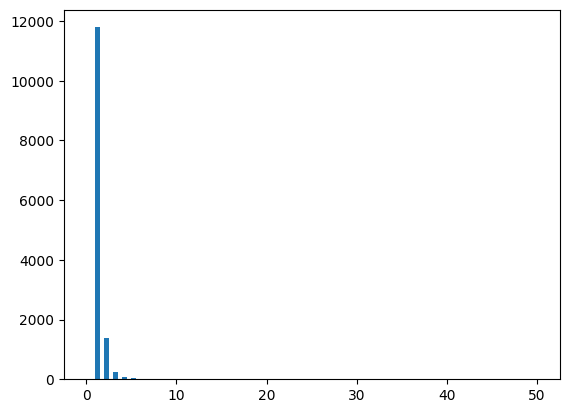

In [16]:
# range -> 0 to 58 since count max is 50 of a particular landmark_id
plt.hist(data['count'],100,range=(0,50),label='test')

In [17]:
# To see how many data 'count' are between 0 to 5 from histogram
data['count'].between(0,5).sum()

np.int64(13549)

In [18]:
data['count'].between(5,10).sum()

np.int64(69)

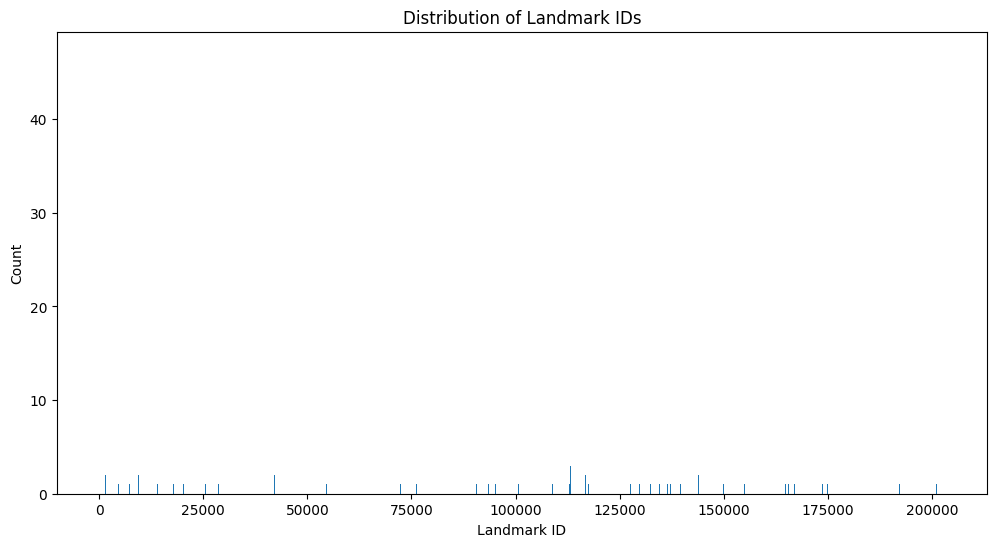

In [19]:
counts = df["landmark_id"].value_counts()

plt.figure(figsize=(12,6))
plt.bar(counts.index, counts.values)
plt.xlabel("Landmark ID")
plt.ylabel("Count")
plt.title("Distribution of Landmark IDs")
plt.show()

# Outliers are present in Data -> Data Point that is very different (unusually large or small)
#                                 compared to the rest of the data

# Example:
# Heights of people in a class: 160, 162, 165, 170, 172, 250
# Here, 250 cm is an Outlier because it’s far away from the normal human height range

In [20]:
# Training of Model

from sklearn.preprocessing import LabelEncoder

# Create an object(lEncoder) for LabelEncoder
# Label Encoder -> Converts Categorical Labels (strings or categories) into
#                  Numeric Codes (integers)
lEncoder = LabelEncoder()
lEncoder.fit(df["landmark_id"])

LabelEncoder()

In [21]:
df.head()

,id,url,landmark_id
108,0036d78c05c194d9,https://upload.wikimedia.org/wikipedia/commons...,50089
172,00c08b162f34f53f,https://upload.wikimedia.org/wikipedia/commons...,163404
710,00e5d77c905d94a6,https://upload.wikimedia.org/wikipedia/commons...,26066
1256,00c8dba0df4d112a,https://upload.wikimedia.org/wikipedia/commons...,35744
1262,001cd787f1e9a803,https://upload.wikimedia.org/wikipedia/commons...,61937


In [22]:
# To convert String Data into Integers
def encode_label(lb1):
  return lEncoder.transform(lb1)

In [23]:
# To convert Integers into String Data
def decode_label(lb1):
  return lEncoder.inverse_transform(lb1)

In [24]:
# Paramter is 'row num' from our dataframe
def get_image_from_number(num,df):
  # fname -> the image file name ('id' of column)
  # label -> landmark_id (to differentiate each unique landmark)
  fname, label = df.iloc[num, :]
  fname = fname + '.jpg'
  f1 = fname[0]
  f2 = fname[1]
  f3 = fname[2]

  path = os.path.join(f1,f2,f3,fname)
  img = cv2.imread(os.path.join(base_path,path))

  return img,label

4 Sample images from random classes


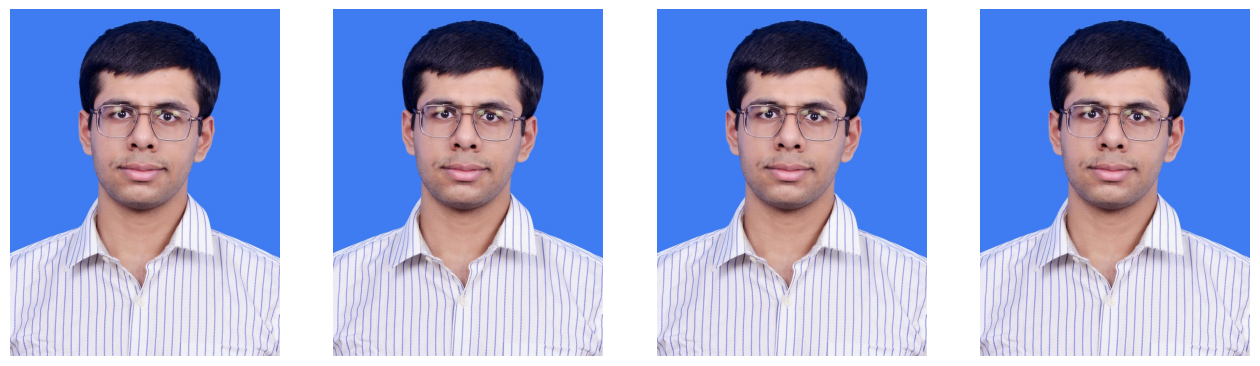

In [25]:
print("4 Sample images from random classes")

fig = plt.figure(figsize=(16, 16))
# Loop for 4 images
for i in range(1, 5):
    # Picking 3 random directories/files
    r1 = random.sample(os.listdir(base_path), 3)

    # The Image folder has nested folders, separated according to the characters
    # of the id of dataset
    # Example -> ID : 00c08b162f34f53f	is stored in '0' folder which has '0' folder
    #            which has another folder 'c' which would contain jpeg image

    #folder = base_path + '/' + r1[0] + '/' + r1[1] + '/' + r1[2]
    folder =  base_path

    # picks One Random image from folder
    random_img = random.choice(os.listdir(folder))

    # Opens the image file using Pillow and converts it into a NumPy array so
    # matplotlib can display it
    img = np.array(Image.open(folder + '/' + random_img))

    # Placing the image in one of four slots
    fig.add_subplot(1, 4, i)
    plt.imshow(img)

    # hides x/y axis lines
    plt.axis('off')

plt.show()

In [26]:
# Loads TensorFlow, which is the main deep learning library and
# TensorFlow powers Keras which helps in building, training, and running neural networks.

import tensorflow as tf

# VGG19 → a ready-made deep learning model trained on millions of images
from keras.applications.vgg19 import VGG19

# Importing all building blocks of neural network
from keras.layers import *
from keras import Sequential

tf.compat.v1.disable_eager_execution

<function tensorflow.python.framework.ops.disable_eager_execution() -> None>

In [27]:
# Parameters

# Slower leraning is more stable
learning_rate = 0.0001
# Learning rate decreases as training goes on
decay_speed    = 1e-6
# Used in optimizers
momentum       = 0.09

# "sparse_categorical_crossentropy" is used for multi-class classification,
# when labels are integers like 0,1,2,etc instead of one-hot vectors
loss_function  = "sparse_categorical_crossentropy"
# Loading VGG19 Model
source_model   = VGG19(weights=None)

# To avoid Overfitting (done by randomly ignoring neurons)
drop_layer     = Dropout(0.5)
drop_layer2    = Dropout(0.5)


In [28]:

# Creates an empty Sequential model which is like an empty box where
# we will keep adding layers one by one

model = Sequential()

# source_model is VGG19 whose layers are being added to our new model
for layer in source_model.layers[:-1]:
    # During training, each layer produces outputs (called activations) which can
    # become unstable hence BatchNormalization is used for stabilization
    if layer == source_model.layers[-25]:
        model.add(BatchNormalization())
    model.add(layer)

# softmax -> Turns output to probabilities
model.add(Dense(num_classes, activation="softmax"))
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 224, 224, 3)    │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 195,244,385 (744.80 MB)

 Trainable params: 195,244,379 (744.80 MB)

 Non-trainable params: 6 (24.00 B)

In [29]:
# Optimizer compares true label and loss function (how wrong it is)
# and adjust the weights so that next time the prediction might be closer to truth
from keras.optimizers import RMSprop

# RMSprop learns from mistakes and adjusts weights(to be closer to truth)
# according to its leaning rate
optim1 = RMSprop(learning_rate = learning_rate)
# Preparing the model for traning by telling which optimizer to use and how to
# measure loss and setting goal of model to focus on 'accuarcy'
model.compile(optimizer=optim1,
              loss=loss_function,
              metrics=["accuracy"])


In [30]:
# OpenCV resizes the image according to the target_size
def image_reshape(im, target_size):
    return cv2.resize(im, target_size)


In [31]:
# This function takes a small piece of your dataset → loads the images → resizes & normalizes them →
# encodes the labels → returns them as arrays.

# Analogy : It’s like preparing a mini meal (batch) for your model instead of
#           serving the whole buffet (dataset) at once.
def get_batch(dataframe, start, batch_size):
    image_array = []
    label_array = []

    end_img = start + batch_size
    if end_img > len(dataframe):
        end_img = len(dataframe)

    for idx in range(start, end_img):
        n = idx
        im, label = get_image_from_number(n, dataframe)
        im = image_reshape(im, (224, 224)) / 255.0
        image_array.append(im)
        label_array.append(label)

    label_array = encode_label(label_array)

    return np.array(image_array), np.array(label_array)


In [32]:

batch_size = 16
epoch_shuffle = True
weight_classes = True

# Lots of Data (Heavy for System) : Recommended to see the entire data at once (Epochs=1)
epochs = 1

# Shuffle the DataFrame
# Split into train and validation sets (80% train, 20% validation)
train, val = np.split(df.sample(frac=1), [int(0.8 * len(df))])

# Printing Images available to be Trained and Validated
print(len(train))
print(len(val))



12925
3232


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [33]:
# Training (Heavy System Requirements)
for e in range(epochs):
    print("Epoch : " + str(e+1) + "/" + str(epochs))
    if epoch_shuffle:
        train = train.sample(frac=1)
    for it in range(int(np.ceil(len(train) / batch_size))):
        X_train, y_train = get_batch(train, it*batch_size, batch_size)

        model.train_on_batch(X_train, y_train)

model.save("Model")

# I didnt download dataset (1 GB per file and save it to drive Images Folder to Access)

Epoch : 1/1


ValueError: too many values to unpack (expected 2)

In [ ]:
# Test
batch_size = 16

errors = 0
good_preds = []
bad_pred = []

for it in range(int(np.ceil(len(val) / batch_size))):
    X_val, y_val = get_batch(val, it*batch_size, batch_size)

    result = model.predict(X_val)
    cla = np.argmax(result, axis=1)
    for idx, res in enumerate(result):
        if cla[idx] != y_val[idx]:
            errors = errors + 1
            bad_pred.append([batch_size*it + idx, cla[idx], res[cla[idx]]])
        else:
            good_preds.append([batch_size*it + idx, cla[idx], res[cla[idx]]])

for i in range(1, 6):
    n = int(good_preds[0])
    img, lbl = get_image_from_number(n, val)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
